# Подключение необходимых библиотек

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

# Задание 1


n: Количество злокачественных клеток

m: Количество здоровых клеток

k: Заданное значение k

N: Число оставшихся здоровых клеток

count: Количество симуляций, где N >= k и выполнено условие

In [3]:
# Генерация времен гибели здоровых клеток
def generate_times(m, healthy_lambda):
    healthy_times = np.random.exponential(scale=1 / healthy_lambda, size=m)     # Здоровые клетки (время)
    return healthy_times

In [4]:
def conditional_monte_carlo(n, m, k, num_samples=1000):
    count = 0
    
    for _ in range(num_samples):
        healthy_times = generate_times(m, 2)                          # Генерация времен гибели хороших клеток
        sorted_healthy_times = np.sort(healthy_times)[::-1]           # Сортировка времен гибели здоровых клеток (По убыванию)
        T_k = sorted_healthy_times[k-1]                               # Определение k-го по величине времени гибели здоровых клеток    

        # Вычисляем вероятность, что все злокачественные клетки погибли до T_k
        malignant_lambdas = np.ones(n)

        prob_all_malignant_dead = np.prod(1 - np.exp(-malignant_lambdas * T_k))   # Произведение

        count += prob_all_malignant_dead

    probability = count / num_samples
    return probability

In [5]:
n = 5     # Количество злокачественных клеток
m = 2000  # Количество здоровых клеток
k = 3     # Заданное значение k
healthy_lambda = 0.5

# Оценка вероятности
probability = conditional_monte_carlo(n, m, k)
print(f"Оценка вероятности P(N >= {k}): {probability}")

Оценка вероятности P(N >= 3): 0.8263514206420465


# Задание 1.2
Рассматриваются случайные блуждания без самопересечений (SAW-Self-Avoiding Walk) на неограниченной двумерной целочисленной решетке, стартующие с начала координат (см. рис. 1). Найти оценку среднего расстояния от начала координат до финальной точки блуждания заданной длины n с помощью метода существенной выборки.

In [6]:
# Вычисление дистанции от начальной точки (0, 0) до текущей
def calculate_distance(path):
    x, y = path[-1]
    return math.sqrt(x**2 + y**2)

In [ ]:
def generate_saw(n):
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    path = [(0, 0)]
    weight = 1.0
    
    for _ in range(n):
        available_directions = []
        
        for dx, dy in directions:
            new_x, new_y = path[-1][0] + dx, path[-1][1] + dy
            if (new_x, new_y) not in path:
                available_directions.append((dx, dy))
    
        if not available_directions:
            break
        
        # Обновляю вес перед выбором направления
        weight *= len(available_directions)
        
        # Выбираю случайное направление
        dx, dy = random.choice(available_directions)
        new_x, new_y = path[-1][0] + dx, path[-1][1] + dy
        path.append((new_x, new_y))
    
    return path, weight

In [8]:
n = 17
num_samples = 10000 
distances = []
weights = []

for _ in range(num_samples):
        path, weight = generate_saw(n)
        if len(path) == n + 1:
            distance = calculate_distance(path)
            distances.append(distance)
            weights.append(weight)

distances = np.array(distances)
weights = np.array(weights)
total_weight = sum(weights)
norm_weights = np.array([w / total_weight for w in weights])

weighted_mean = np.sum(distances * norm_weights)
print(f"Среднее расстояние: {weighted_mean:.4f}")

Среднее расстояние: 7.1294


In [9]:
def plot_saw(path):
    """Построение графика самобходящего случайного блуждания."""
    x = [point[0] for point in path]
    y = [point[1] for point in path]
    
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, marker='o', linestyle='-', color='b', markersize=5)
    plt.scatter(0, 0, color='red', label='Начало', zorder=5)  # Начальная точка
    plt.scatter(x[-1], y[-1], color='green', label='Конец', zorder=5)  # Конечная точка
    plt.title(f"Самобходящее случайное блуждание (n = {len(path)-1})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.show()

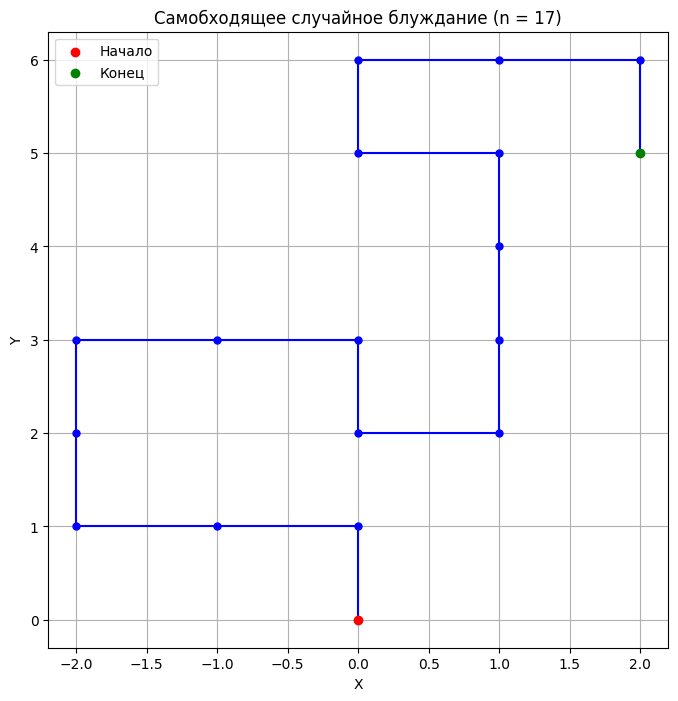

In [10]:
# Генерация и построение графика (просто как пример)
path, weight = generate_saw(n)
plot_saw(path)